In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\rudaf\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\rudaf\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [22]:
tracking_week_df=pd.read_csv('./data/tracking_week_9.csv')
plays_df=pd.read_csv('./data/plays.csv')
players_df=pd.read_csv('./data/players.csv')
games_df=pd.read_csv('./data/games.csv')
player_play_df=pd.read_csv('./data/player_play.csv')

In [23]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [24]:
print(tracking_week_df.columns)
print(plays_df.columns)
print(players_df.columns)
print(games_df.columns)
print(player_play_df.columns)

Index(['gameId', 'playId', 'nflId', 'displayName', 'frameId', 'frameType',
       'time', 'jerseyNumber', 'club', 'playDirection', 'x', 'y', 's', 'a',
       'dis', 'o', 'dir', 'event'],
      dtype='object')
Index(['gameId', 'playId', 'playDescription', 'quarter', 'down', 'yardsToGo',
       'possessionTeam', 'defensiveTeam', 'yardlineSide', 'yardlineNumber',
       'gameClock', 'preSnapHomeScore', 'preSnapVisitorScore',
       'playNullifiedByPenalty', 'absoluteYardlineNumber',
       'preSnapHomeTeamWinProbability', 'preSnapVisitorTeamWinProbability',
       'expectedPoints', 'offenseFormation', 'receiverAlignment',
       'playClockAtSnap', 'passResult', 'passLength', 'targetX', 'targetY',
       'playAction', 'dropbackType', 'dropbackDistance', 'passLocationType',
       'timeToThrow', 'timeInTackleBox', 'timeToSack', 'passTippedAtLine',
       'unblockedPressure', 'qbSpike', 'qbKneel', 'qbSneak',
       'rushLocationType', 'penaltyYards', 'prePenaltyYardsGained',
       'yardsGai

### Jugadores

In [25]:
print('Número de jugadores de los que se tienen registros de participaciones en la semana: '+str(len(tracking_week_df['displayName'].unique())))

Número de jugadores de los que se tienen registros de participaciones en la semana: 975


In [53]:
players_df_copy=players_df.copy()
tracking_week_df_c=tracking_week_df.copy()
tracking_week_df_copy=tracking_week_df_c[(tracking_week_df_c['displayName']!='football') & 
                                         (tracking_week_df_c['club']!='football')]

C:\Users\rudaf\AppData\Local\Temp\ipykernel_54468\3752334059.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tracking_week_df_copy['position']=tracking_week_df_copy['nflId'].map(players_df_week.set_index('nflId')['position'])


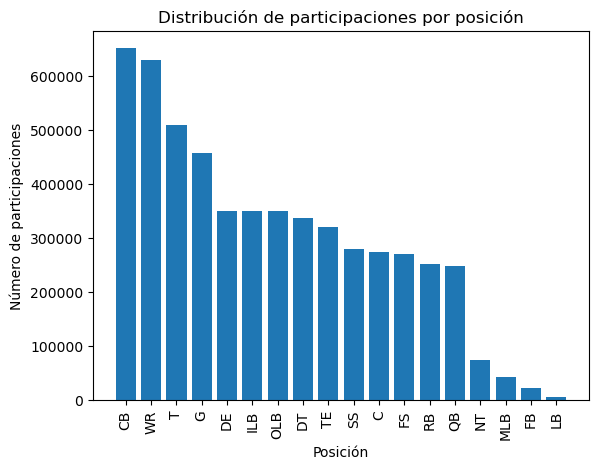

In [54]:
# Cantidad de participaciones por posición
nflIds=tracking_week_df_copy['nflId'].unique()
players_df_copy.index=players_df_copy['nflId']
players_df_week=players_df_copy.loc[nflIds]

tracking_week_df_copy['position']=tracking_week_df_copy['nflId'].map(players_df_week.set_index('nflId')['position'])
#print(tracking_week_df_copy['position'].head())

part_por_pos=tracking_week_df_copy['position'].value_counts()
#print(part_por_pos)
                            
plt.bar(x=part_por_pos.index,height=part_por_pos.values)
plt.xticks(rotation=90)
plt.title('Distribución de participaciones por posición')
plt.xlabel('Posición')
plt.ylabel('Número de participaciones')
plt.show()

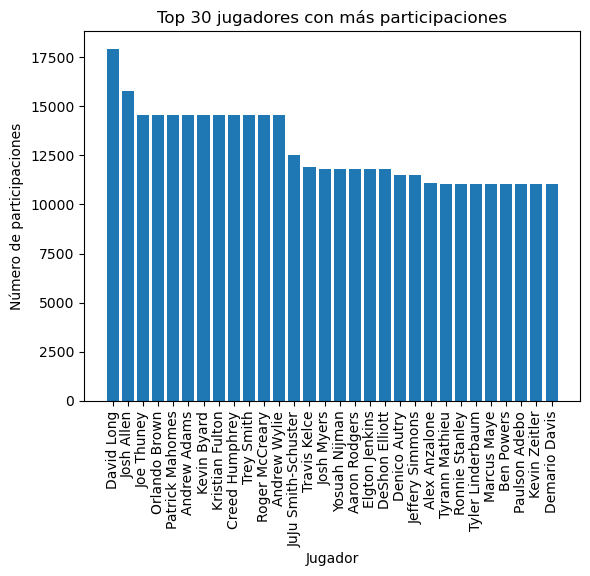

In [55]:
#Cantidad de participaciones por jugador
part_por_jugador=tracking_week_df_copy['displayName'].value_counts()
#print(part_por_jugador.head(30))
                            
plt.bar(x=part_por_jugador.head(30).index,height=part_por_jugador.head(30).values)
plt.xticks(rotation=90)
plt.title('Top 30 jugadores con más participaciones')
plt.xlabel('Jugador')
plt.ylabel('Número de participaciones')
plt.show()

In [94]:
player_play_df_copy=player_play_df.copy()

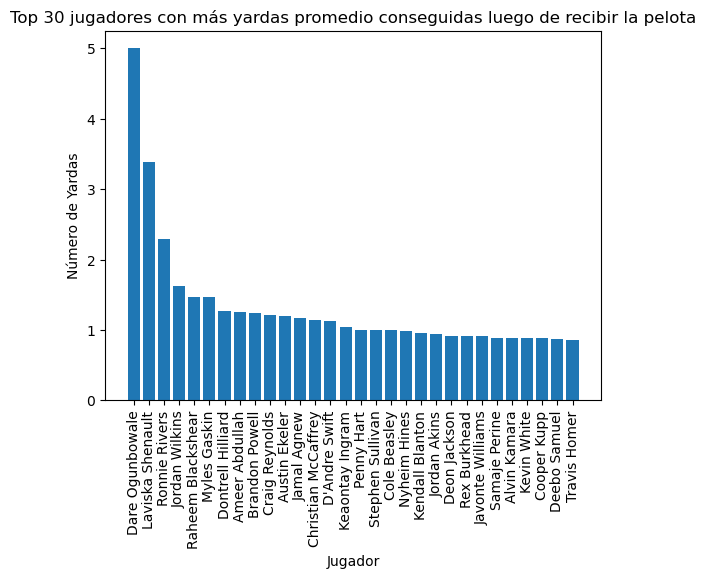

In [93]:
#Yardas conseguidas por jugador
player_play_df_copy['displayName']=player_play_df_copy['nflId'].map(players_df_copy.set_index('nflId')['displayName'])

groupby_por_nflId=player_play_df_copy[['nflId','yardageGainedAfterTheCatch','displayName']].groupby(['nflId','displayName'])
yardas_conseguidas_por_jugador=groupby_por_nflId['yardageGainedAfterTheCatch'].mean().sort_values(ascending=False)
jugadores=[]
for i in yardas_conseguidas_por_jugador.index:
    jugadores.append(i[1])

plt.bar(x=jugadores[:30],height=yardas_conseguidas_por_jugador.head(30).values)
plt.xticks(rotation=90)
plt.title('Top 30 jugadores con más yardas promedio conseguidas luego de recibir la pelota')
plt.xlabel('Jugador')
plt.ylabel('Número de Yardas')
plt.show()

### Jugadas

In [112]:
plays_df_copy=plays_df.copy()
plays_df_copy.shape

(16124, 50)

In [113]:
conteo_jugadas=plays_df_copy['playId'].value_counts()
print('Número de jugadas diferentes registradas: '+str(len(conteo_jugadas)))

Número de jugadas diferentes registradas: 4207


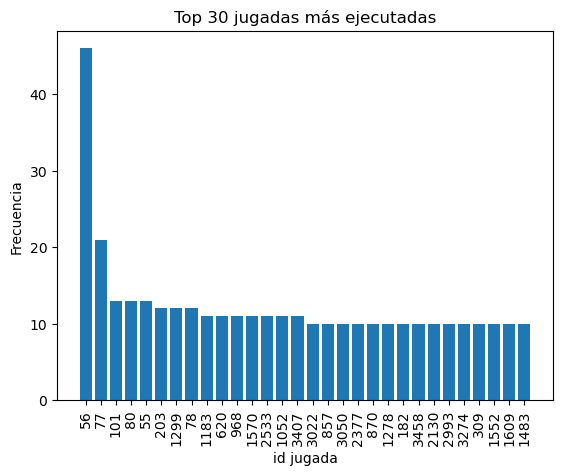

In [114]:
#Frecuencia de realización de jugadas
etiquetas=[str(i) for i in conteo_jugadas.index]
plt.bar(x=etiquetas[:30],height=conteo_jugadas.head(30).values)
plt.xticks(rotation=90)
plt.title('Top 30 jugadas más ejecutadas')
plt.xlabel('id jugada')
plt.ylabel('Frecuencia')
plt.show()

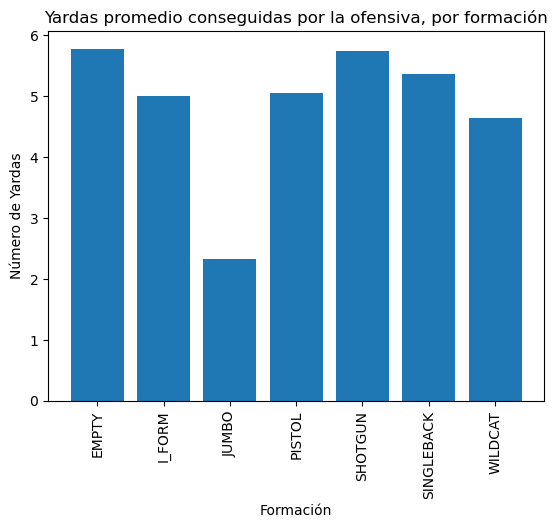

In [145]:
#Yardas conseguidas por jugada
yardas_por_jugada=plays_df_copy[['offenseFormation','yardsGained']].groupby('offenseFormation').mean()
yardas=[i[0] for i in yardas_por_jugada.values]
plt.bar(x=yardas_por_jugada.index,height=yardas)
plt.xticks(rotation=90)
plt.title('Yardas promedio conseguidas por la ofensiva, por formación')
plt.xlabel('Formación')
plt.ylabel('Número de Yardas')
plt.show()

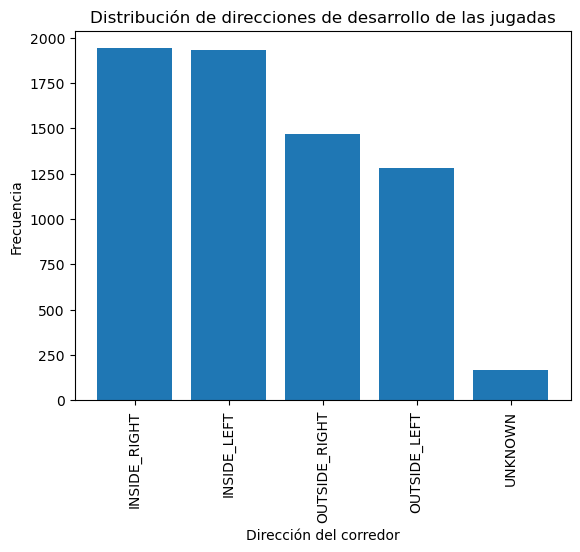

In [127]:
#Dirección del ejecución de la jugada
direccion_jugadas=plays_df_copy['rushLocationType'].value_counts()
plt.bar(x=direccion_jugadas.index,height=direccion_jugadas.values)
plt.xticks(rotation=90)
plt.title('Distribución de direcciones de desarrollo de las jugadas')
plt.xlabel('Dirección del corredor')
plt.ylabel('Frecuencia')
plt.show()

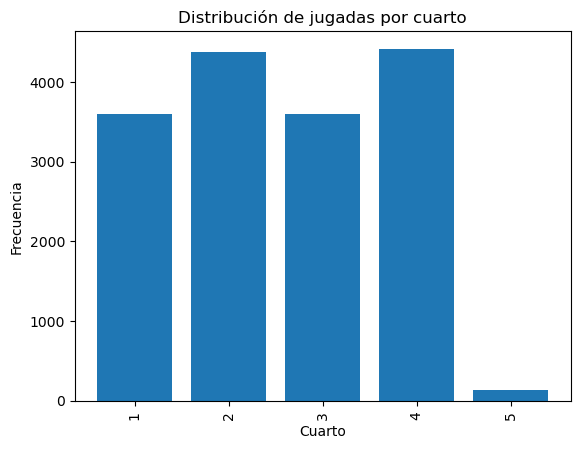

In [129]:
#Jugadas realizadas por cuarto
jugadas_por_cuarto=plays_df_copy['quarter'].value_counts()
plt.bar(x=jugadas_por_cuarto.index,height=jugadas_por_cuarto.values)
plt.xticks(rotation=90)
plt.title('Distribución de jugadas por cuarto')
plt.xlabel('Cuarto')
plt.ylabel('Frecuencia')
plt.show()

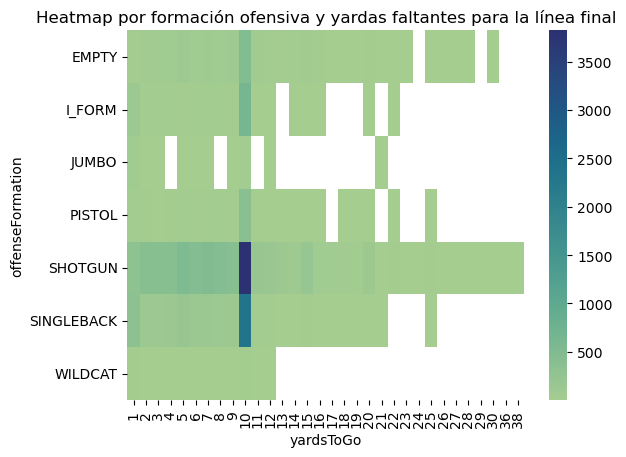

In [155]:
dicc_info={}
dicc_info['offenseFormation']=plays_df_copy['offenseFormation'].values
dicc_info['yardsToGo']=plays_df_copy['yardsToGo'].values

heat_df=pd.DataFrame(dicc_info).value_counts().unstack()
sns.heatmap(heat_df,xticklabels=True,cmap="crest")
plt.title('Heatmap por formación ofensiva y yardas faltantes para la línea final')
plt.show()
